# Soil Analaysis using NSDB from the Government of Canada

In [2]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gdf = gpd.read_file("soil_layer_canada.dbf")

In [3]:
print(gdf.head())

       SOIL_ID PROVINCE SOIL_CODE MODIFIER PROFILE  LAYER_NO  UDEPTH  LDEPTH  \
0  ABABCgl~~~N       AB       ABC    gl~~~       N         1      -5       0   
1  ABABCgl~~~N       AB       ABC    gl~~~       N         2       0      13   
2  ABABCgl~~~N       AB       ABC    gl~~~       N         3      13      23   
3  ABABCgl~~~N       AB       ABC    gl~~~       N         4      23      58   
4  ABABCgl~~~N       AB       ABC    gl~~~       N         5      58      91   

  HZN_LIT HZN_MAS  ...  KSAT KP0  KP10 KP33  KP1500    BD  EC  CACO3  VONPOST  \
0    None      LH  ...  30.0  80    60   -9      20  0.10   0      0        4   
1    None       A  ...  10.0  49    -9   18       8  1.35   0      0       -9   
2    None      AB  ...  10.0  45    -9   28      15  1.45   0      0       -9   
3    None       B  ...   3.0  42    -9   36      22  1.55   0      0       -9   
4    None       B  ...   3.0  42    -9   35      21  1.55   0      0       -9   

   WOOD  
0     5  
1    -9  
2 

In [4]:
print(gdf.tail())

           SOIL_ID PROVINCE SOIL_CODE MODIFIER PROFILE  LAYER_NO  UDEPTH  \
64475  YTYUN~~~~~N       YT       YUN    ~~~~~       N         5      50   
64476  YTZMA~~~~~N       YT       ZMA    ~~~~~       N         1       0   
64477  YTZMA~~~~~N       YT       ZMA    ~~~~~       N         2       1   
64478  YTZMA~~~~~N       YT       ZMA    ~~~~~       N         3       2   
64479  ONZZZ~~~~~N       ON       ZZZ    ~~~~~       N         1       0   

       LDEPTH HZN_LIT HZN_MAS  ...  KSAT KP0  KP10 KP33  KP1500    BD  EC  \
64475     100    None       C  ...  30.0  40    15    4       2  1.20   0   
64476       1    None       C  ...   5.0  45    20   10       4  1.00   1   
64477       2    None       H  ...   5.0  92    70   55      26  0.08   1   
64478     100    None       C  ...   1.0  50    35   32      17  1.20   1   
64479     100    None       -  ...  -9.0  -9    -9   -9      -9 -9.00  -9   

       CACO3  VONPOST  WOOD  
64475      3       -9    -9  
64476      0       -

In [5]:
print(gdf.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64480 entries, 0 to 64479
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SOIL_ID    64480 non-null  object 
 1   PROVINCE   64480 non-null  object 
 2   SOIL_CODE  64480 non-null  object 
 3   MODIFIER   64480 non-null  object 
 4   PROFILE    64480 non-null  object 
 5   LAYER_NO   64480 non-null  int32  
 6   UDEPTH     64480 non-null  int32  
 7   LDEPTH     64480 non-null  int32  
 8   HZN_LIT    5770 non-null   object 
 9   HZN_MAS    64477 non-null  object 
 10  HZN_SUF    52745 non-null  object 
 11  HZN_MOD    11201 non-null  object 
 12  COFRAG     64480 non-null  int32  
 13  DOMSAND    64480 non-null  object 
 14  VFSAND     64480 non-null  int32  
 15  TSAND      64480 non-null  int32  
 16  TSILT      64480 non-null  int32  
 17  TCLAY      64480 non-null  int32  
 18  ORGCARB    64480 non-null  float64
 19  PHCA       64480 non-null  float64
 20  PH2   

## Divide into two tables for further quantitative analysis - Looking for trends

In [6]:
gdf_soil_properties = gdf[['SOIL_ID', 'PROVINCE', 'SOIL_CODE', 'MODIFIER', 'PROFILE']]
gdf_layer_properties = gdf[['SOIL_ID', 'LAYER_NO', 'UDEPTH', 'LDEPTH', 'KSAT', 'BD', 'CACO3']]

print("Soil Properties Table:")
print(gdf_soil_properties.head())

print("\nLayer Properties Table:")
print(gdf_layer_properties.head())

Soil Properties Table:
       SOIL_ID PROVINCE SOIL_CODE MODIFIER PROFILE
0  ABABCgl~~~N       AB       ABC    gl~~~       N
1  ABABCgl~~~N       AB       ABC    gl~~~       N
2  ABABCgl~~~N       AB       ABC    gl~~~       N
3  ABABCgl~~~N       AB       ABC    gl~~~       N
4  ABABCgl~~~N       AB       ABC    gl~~~       N

Layer Properties Table:
       SOIL_ID  LAYER_NO  UDEPTH  LDEPTH  KSAT    BD  CACO3
0  ABABCgl~~~N         1      -5       0  30.0  0.10      0
1  ABABCgl~~~N         2       0      13  10.0  1.35      0
2  ABABCgl~~~N         3      13      23  10.0  1.45      0
3  ABABCgl~~~N         4      23      58   3.0  1.55      0
4  ABABCgl~~~N         5      58      91   3.0  1.55      0


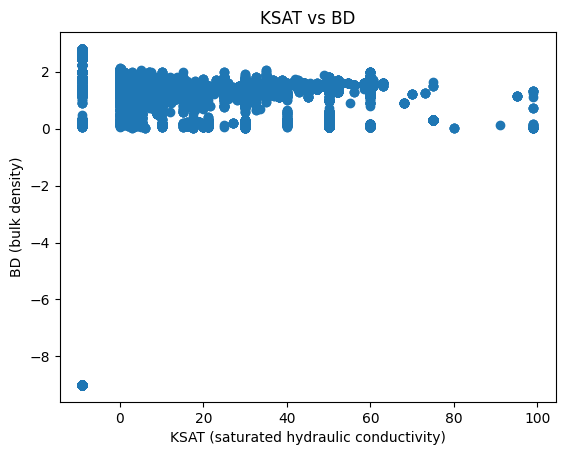

In [7]:
plt.scatter(gdf_layer_properties['KSAT'], gdf_layer_properties['BD'])
plt.xlabel('KSAT (saturated hydraulic conductivity)')
plt.ylabel('BD (bulk density)')
plt.title('KSAT vs BD')
plt.show()

In [8]:
print(gdf_layer_properties['KSAT'].unique())
print(gdf_layer_properties['BD'].unique())

[30.   10.    3.   ...  1.09  3.76  5.36]
[ 0.1   1.35  1.45  1.55  1.25  0.08  1.4   1.5   1.    1.3   0.9   1.15
  2.    1.1   0.12  1.2   1.65  0.95  0.06  0.2   0.18  0.05  1.6   1.05
  0.6   0.15  0.25  0.3  -9.    2.65  0.11  1.57  0.22  1.32  1.41  1.56
  1.14  1.59  1.42  0.4   0.17  1.54  1.47  1.85  1.84  1.7   0.28  1.33
  1.44  1.58  1.63  1.34  1.52  1.69  1.73  1.08  1.19  1.31  1.24  1.75
  1.8   0.5   1.86  1.87  0.13  1.48  1.49  1.62  1.68  0.14  1.13  1.64
  1.27  0.46  0.82  1.16  1.23  1.28  1.36  0.21  0.23  1.66  1.26  1.46
  2.1   1.95  1.37  1.82  1.38  0.99  1.29  1.39  1.17  1.53  1.61  1.88
  1.11  0.8   2.13  1.06  1.76  1.22  0.69  0.89  0.74  1.43  1.92  1.51
  1.18  1.04  1.09  1.21  1.98  1.67  0.97  0.71  0.68  0.7   1.79  0.27
  0.42  1.12  1.91  1.74  1.94  1.9   2.08  1.71  1.81  0.88  0.81  0.04
  1.72  0.16  0.92  1.07  1.03  0.75  0.77  0.39  1.77  1.89  1.83  0.85
  0.93  1.01  1.78  0.35  0.45  0.31  0.94  0.96  2.07  0.72  1.99  1.96
  2.06  0

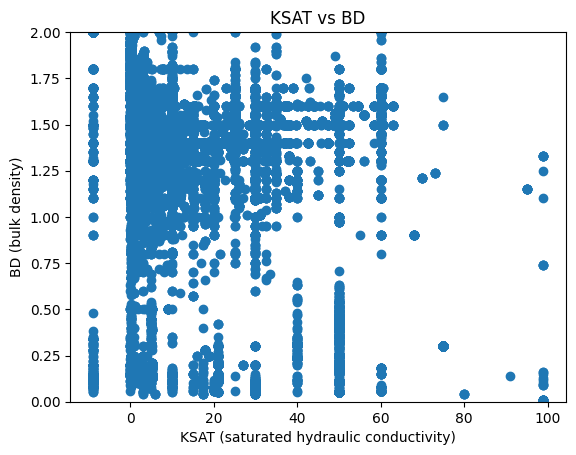

In [9]:
plt.scatter(gdf_layer_properties['KSAT'], gdf_layer_properties['BD'])
plt.xlabel('KSAT (saturated hydraulic conductivity)')
plt.ylabel('BD (bulk density)')
plt.title('KSAT vs BD')
plt.ylim(0, 2) 
plt.show()

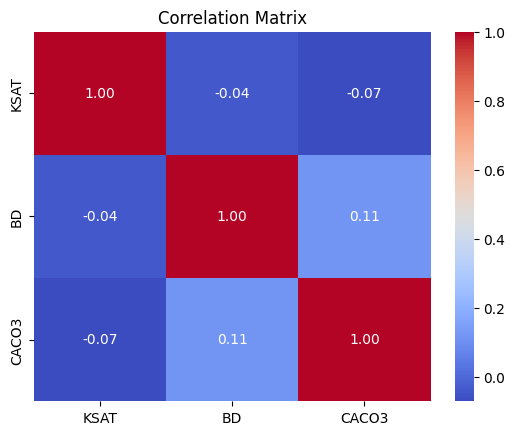

In [10]:
correlation_matrix = gdf_layer_properties[['KSAT', 'BD', 'CACO3']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Conclusion: No linear correlation between these 3 vars -> evidenced by KSAT and BD plot 

### Use describe method for quantitative properties of the soil

In [11]:
qtive_summary  = gdf_layer_properties.describe()
print(qtive_summary)

           LAYER_NO        UDEPTH        LDEPTH          KSAT            BD  \
count  64480.000000  64480.000000  64480.000000  64480.000000  64480.000000   
mean       3.024271     28.483033     52.409181     10.163439      1.253128   
std        1.675477     30.966514     41.897012     15.234723      0.880635   
min        1.000000    -70.000000    -48.000000     -9.000000     -9.000000   
25%        2.000000      0.000000     18.000000      1.000000      1.300000   
50%        3.000000     20.000000     43.000000      3.000000      1.400000   
75%        4.000000     48.000000     92.000000     10.000000      1.500000   
max        9.000000    384.000000    999.000000     99.000000      2.800000   

              CACO3  
count  64480.000000  
mean       4.225605  
std        9.271740  
min       -9.000000  
25%        0.000000  
50%        0.000000  
75%        5.000000  
max       97.000000  


# Reviewing the Soil Name File

In [12]:
import geopandas as gpd

gdf_name = gpd.read_file("soil_name_canada.dbf")

In [13]:
print(gdf_name.head())

       SOIL_ID PROVINCE SOIL_CODE MODIFIER PROFILE   SOILNAME KIND WATERTBL  \
0  ABABCgl~~~N       AB       ABC    gl~~~       N  ATHABASCA    M       YU   
1  ABABCst~~~A       AB       ABC    st~~~       A  ATHABASCA    M       NO   
2  ABABCst~~~N       AB       ABC    st~~~       N  ATHABASCA    M       NO   
3  ABABC~~~~~A       AB       ABC    ~~~~~       A  ATHABASCA    M       NO   
4  ABABC~~~~~N       AB       ABC    ~~~~~       N  ATHABASCA    M       NO   

  ROOTRESTRI RESTR_TYPE  ... PMCHEM3 MDEP1 MDEP2 MDEP3 ORDER2 G_GROUP2  \
0          0          -  ...       -  TILL     -     -   None     None   
1          0          -  ...       -  TILL     -     -   None     None   
2          0          -  ...       -  TILL     -     -   None     None   
3          0          -  ...       -  TILL     -     -   None     None   
4          0          -  ...       -  TILL     -     -   None     None   

  S_GROUP2 ORDER3 G_GROUP3 S_GROUP3  
0     None     LU       GL       GL  
1   

# Soil Capability Data

In [14]:
gdf_MTL_fundl = gpd.read_file("s031h.dbf")

In [15]:
print(gdf_MTL_fundl)

         AREA  PERIMETER  NUM     ID USE      TYPE
0    0.236458   3.272546    2   4186   L      LAND
1    0.054949   9.438440    3   4451   Z     WATER
2    0.377080   4.163283    4   4525   L      LAND
3    0.006749   2.791806    5  10154   Z     WATER
4    1.049579  10.286840    6  10150   L      LAND
..        ...        ...  ...    ...  ..       ...
132  0.000022   0.023887  134   5886   L      LAND
133  0.000024   0.020410  135   5899   Z     WATER
134  0.018832   3.797643  136  10148   8  UNMAPPED
135  0.000028   0.029652  137   5850   Z     WATER
136  0.000035   0.025554  138   5885   L      LAND

[137 rows x 6 columns]


In [16]:
gdf_MTL_detailed = gpd.read_file("a031h.dbf")
print(gdf_MTL_detailed)

          AREA  PERIMETER   NUM    ID        CLI
0     0.022229   1.432487     2  3792  a031h   2
1     0.002121   0.462454     3  3787  a031h   3
2     0.000459   0.120805     4  3783  a031h   4
3     0.001145   0.273557     5  3785  a031h   5
4     0.000254   0.071044     6  3784  a031h   6
...        ...        ...   ...   ...        ...
1265  0.000754   0.139009  1267  3216  a031h1267
1266  0.000247   0.061781  1268  3541  a031h1268
1267  0.000616   0.143750  1269  3791  a031h1269
1268  0.000403   0.123502  1270  3828  a031h1270
1269  0.007590   3.207829  1271  3731  a031h1271

[1270 rows x 5 columns]


In [17]:
print("The gdf_MTL_fundl data set:")
gdf_MTL_fundl.info()

print("\nThe gdf_MTL_detailed data set:")
gdf_MTL_detailed.info()


The gdf_MTL_fundl data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AREA       137 non-null    float64
 1   PERIMETER  137 non-null    float64
 2   NUM        137 non-null    int64  
 3   ID         137 non-null    int64  
 4   USE        137 non-null    object 
 5   TYPE       137 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 6.6+ KB

The gdf_MTL_detailed data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AREA       1270 non-null   float64
 1   PERIMETER  1270 non-null   float64
 2   NUM        1270 non-null   int64  
 3   ID         1270 non-null   int64  
 4   CLI        1270 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 49.7+ KB


In [18]:
print(gdf_MTL_detailed.describe())

              AREA    PERIMETER         NUM           ID
count  1270.000000  1270.000000  1270.00000  1270.000000
mean      0.001575     0.275811   636.50000  3191.537008
std       0.004019     0.354487   366.76173   370.416067
min       0.000014     0.015374     2.00000  2551.000000
25%       0.000395     0.113267   319.25000  2870.250000
50%       0.000793     0.190572   636.50000  3192.500000
75%       0.001567     0.320065   953.75000  3511.750000
max       0.089534     6.740735  1271.00000  3833.000000


In [19]:
print(gdf_MTL_detailed.iloc[:, :-1])

          AREA  PERIMETER   NUM    ID
0     0.022229   1.432487     2  3792
1     0.002121   0.462454     3  3787
2     0.000459   0.120805     4  3783
3     0.001145   0.273557     5  3785
4     0.000254   0.071044     6  3784
...        ...        ...   ...   ...
1265  0.000754   0.139009  1267  3216
1266  0.000247   0.061781  1268  3541
1267  0.000616   0.143750  1269  3791
1268  0.000403   0.123502  1270  3828
1269  0.007590   3.207829  1271  3731

[1270 rows x 4 columns]


## Efficiency: Largest area, minimize perimeter (imagine fencing cost, or want all animals in close perimeter)

In [20]:
max_area = 0
min_perimeter = 0 
best_row = None  # Variable to store the row with max area and min perimeter
best_index = None  # Variable to store the index of the best row


for index, row in gdf_MTL_detailed.iterrows():
    area = row['AREA']
    perimeter = row['PERIMETER']
    
    # If current area is greater than max_area, update max_area and reset min_perimeter
    if area > max_area:
        max_area = area
        min_perimeter = perimeter
        best_row = row
        best_index = index
        
    # If current area equals max_area but has a smaller perimeter, update min_perimeter
    elif area == max_area and perimeter < min_perimeter:
        min_perimeter = perimeter
        best_row = row
        best_index = index

print(f"Land with max area: Area = {best_row['AREA']}, Perimeter = {best_row['PERIMETER']} (Row index: {best_index})")


Land with max area: Area = 0.089534491, Perimeter = 6.7407351 (Row index: 61)
